In [ ]:
#apps must be servable, or at least servable apps must be first

In [2]:
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
import ipywidgets as widgets
from pycromanager import Core
%matplotlib ipympl
import matplotlib.pyplot as plt

pn.extension()
pn.extension('ipywidgets')

In [3]:
core = Core()

In [4]:
#dif stages?
stage_name = 'XY'

In [30]:
image_button = pn.widgets.Button(name='Snap Image', button_type='primary')
histo_button = pn.widgets.Button(name='Histogram', button_type='primary')
image_output = widgets.Output()
histo_output= widgets.Output()

up_button = pn.widgets.Button(name='^', button_type='primary')
left_button = pn.widgets.Button(name='<', button_type='primary')
right_button = pn.widgets.Button(name='>', button_type='primary')
down_button = pn.widgets.Button(name='v', button_type='primary')

#position_button = pn.widgets.Button(name='get xy position', button_type='primary')
static_text=pn.widgets.StaticText(name='XY Position',value=(core.get_x_position(),core.get_y_position()))
#pixels=[]


def snap():
    core.wait_for_system()
    core.snap_image()
    tagged_image = core.get_tagged_image()
    height = tagged_image.tags['Height']
    width = tagged_image.tags['Width']
    pixels = np.reshape(tagged_image.pix,
                    newshape=[height, width, tagged_image.pix.shape[0]//(height*width)])
    return pixels

def on_image_button_clicked(b):
    with image_output:
        image_output.clear_output()
        pixels=snap()
                
        plt.close()
        plt.imshow(pixels)
        plt.title("Image")
        plt.show()
        
def on_histo_button_clicked(b):
    with histo_output:
        histo_output.clear_output()
        pixels= snap()
        
        plt.close()
        h,x = np.histogram(pixels.flatten(),bins=64)
        plt.plot(x[:-1],h)  
        plt.title("Histogram")
        plt.show()
        
def on_move_up_button_clicked(b):
    core.set_relative_xy_position(stage_name, 0,1)
    
def on_move_left_button_clicked(b):
    core.set_relative_xy_position(stage_name, -1,0)

def on_move_right_button_clicked(b):
    core.set_relative_xy_position(stage_name, 1,0)
    
def on_move_down_button_clicked(b):
    core.set_relative_xy_position(stage_name, 0,-1)
    
#def on_position_button_clicked(b):
    #static_text.value =(core.get_x_position(),core.get_y_position())
    

image_button.on_click(on_image_button_clicked)
histo_button.on_click(on_histo_button_clicked)

up_button.on_click(on_move_up_button_clicked)
left_button.on_click(on_move_left_button_clicked) 
right_button.on_click(on_move_right_button_clicked)
down_button.on_click(on_move_down_button_clicked)

#position_button.on_click(on_position_button_clicked)




app = pn.Row(
    pn.Column(
        pn.Row(image_button, histo_button), 
        pn.Row(up_button,align='center'),
        pn.Row(left_button, right_button, align='center'),
        pn.Row(down_button, align='center'),
        #position_button,
        static_text),
    image_output, histo_output)

#p1 = pn.param.ParamFunction(app, lazy=True, name='image display')


Tabs(closable=True, dynamic=True)
    [0] Row
        [0] Column
            [0] Row
                [0] Button(button_type='primary', clicks=2, name='Snap Image')
                [1] Button(button_type='primary', clicks=1, name='Histogram')
            [1] Row(align='center')
                [0] Button(button_type='primary', name='^')
            [2] Row(align='center')
                [0] Button(button_type='primary', name='<')
                [1] Button(button_type='primary', name='>')
            [3] Row(align='center')
                [0] Button(button_type='primary', name='v')
            [4] StaticText(name='XY Position', value=(5833.37, 14778.65))
        [1] IPyWidget(Output)
        [2] IPyWidget(Output)
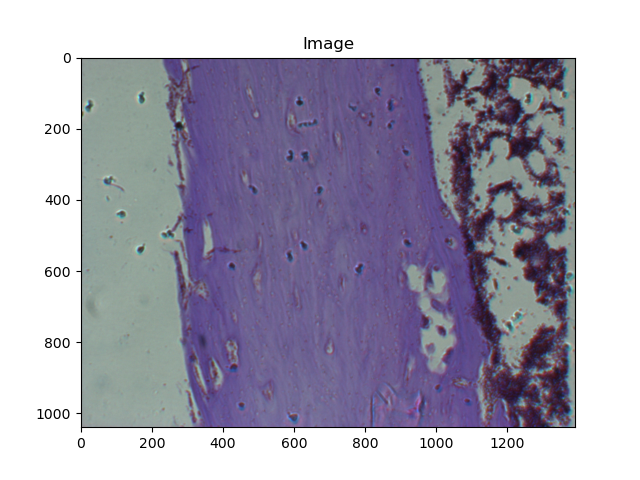
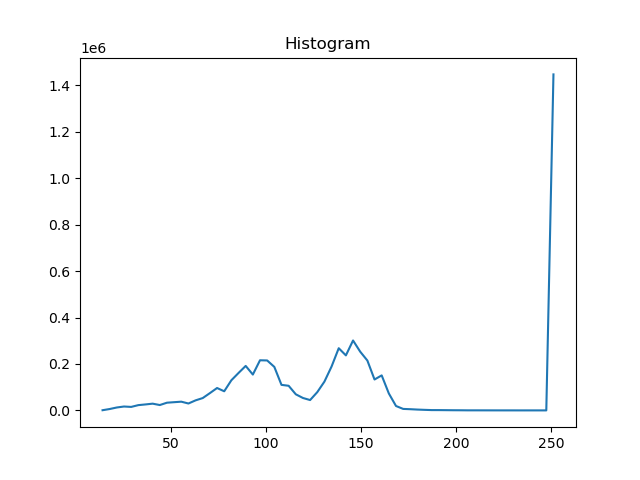

In [33]:
tabs = pn.Tabs(('image disaplay',app),dynamic=True,closable=True)

tabs.servable()

# snap panel widgets trial

# tabs ex

# panel ex